---
# Classifying Iris Species
---

Let’s assume that a hobby botanist is interested in distinguishing the species of some iris flowers that she has found. She has collected some measurements associated with each iris: the length and width of the petals and the length and width of the sepals, all measured in centimeters.

She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species setosa, versicolor, or virginica. For these measurements, she can be certain of which species each iris belongs to. Let’s assume that these are the only species our hobby botanist will encounter in the wild.

Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris

## Meet the Data
The data we will use for this example is the Iris dataset, a classical dataset in machine learning and statistics. It is included in scikit-learn in the datasets module. We can load it by calling the load_iris function:

__Nota:__ Classes, labels, samples y features

Classes: Los posibles outputs de nuestro modelo

Labels: Las etiquetas del output (Classes) deseado para el input

Samples: Elementos individuales de un array de datos

Features: Las propiedades inherentes a los samples

Desde la librería sklearn.datasets se carga el dataset "iris", incluída por defecto.

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

El dataset se cargará en un objeto de tipo "Bunch" propio de la librería sklearn semejante a un diccionario.

In [2]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
type(iris_dataset)

sklearn.utils.Bunch

El campo 'DESCR' contiene una descripción pormenorizada del dataframe, la siguiente celda muestra tan solo una parte de esta descripción.

In [4]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


El campo 'Target names' es un array de strings que contiene las especies de flores que queremos predecir (los outputs o classes).

In [5]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


El campo 'Feature names' es una lista de strings que contiene la descripción de cada característica.

In [6]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the target and data fields. data contains the numeric measurements of sepal length, sepal width, petal length, and petal width in a NumPy array:

In [7]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


Las filas del array de datos representan las flores como tal, cuyas columnas contienen el valor de cada una de las 4 medidas correspondientes para cada flor.

La siguiente celda muestra la forma del array de datos.

In [8]:
# Notese el uso de la función 'shape' equivalente en NumPy
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


We see that the array contains measurements for 150 different flowers. Remember
that the individual items are called samples in machine learning, and their properties are called features. The shape of the data array is the number of samples multiplied by the number of features. This is a convention in scikit-learn, and your data will always be assumed to be in this shape. Here are the feature values for the first five samples:

In [9]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


El 'Target Array' Contiene las especies de cada flor que fue medida, también como un array de NumPy.

In [10]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [11]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


En este caso el 'Target Array' contiene el output de cada especie de flor en números del 0 al 2, un número para cada especie de flor (classes), el significado de cada número esta almacenado en el índice del array 'iris_dataset\['target_names'\]'.

In [12]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Measuring Success: Training and Testing Data

We want to build a machine learning model from this data that can predict the spe‐
cies of iris for a new set of measurements. But before we can apply our model to new
measurements, we need to know whether it actually works—that is, whether we
should trust its predictions

__Nota:__ Training data y Test data

Training data: Los datos con los cuales se va a entrenar nuestro modelo.

Test data: Los datos con los cuales se va a testear nuestro modelo.

scikit-learn contains a function that shuffles the dataset and splits it for you: the train_test_split function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set. 

In scikit-learn, data is usually denoted with a capital X, while labels are denoted by a lowercase y.

Before making the split, the train_test_split function shuffles the dataset using a
pseudorandom number generator.

Let’s call train_test_split on our data and assign the outputs using this nomenclature:

In [14]:
# El random_state es para separar el dataset en valores aleatorios desde una misma seed para obtener los mismos resultados.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

To make sure that we will get the same output if we run the same function several
times, we provide the pseudorandom number generator with a fixed seed using the
random_state parameter. This will make the outcome deterministic, so this line will
always have the same outcome.

The output of the train_test_split function is X_train, X_test, y_train, and
y_test, which are all NumPy arrays. X_train contains 75% of the rows of the dataset,
and X_test contains the remaining 25%

In [15]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [16]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


## First Things First: Look at Your Data

Before building a machine learning model it is often a good idea to inspect the data, to see if the task is easily solvable without machine learning, or if the desired information might not be contained in the data.

Additionally, inspecting your data is a good way to find abnormalities and peculiarities. Maybe some of your irises were measured using inches and not centimeters, for example. In the real world, inconsistencies in the data and unexpected measurements are very common.

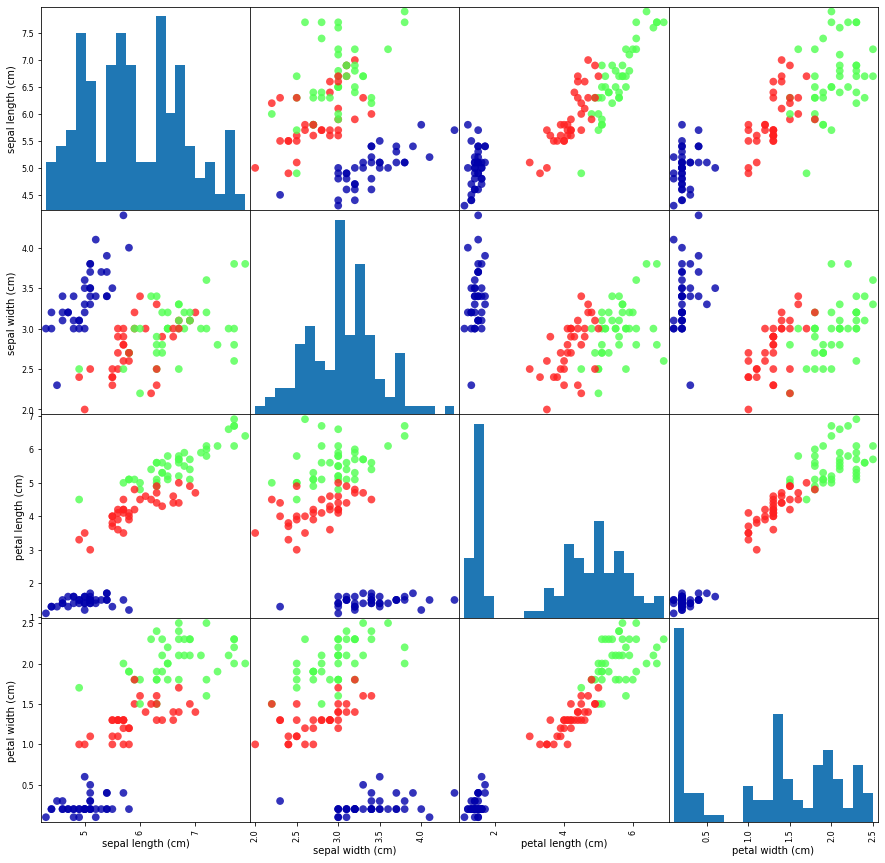

In [17]:
import pandas as pd
# Anaconda por defecto no trae la librería mglearn por lo que es aconsejable instalarla previamente e importarla
import mglearn
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
# Se hizo el cambio pd.scatter_matrix a pd.plotting.scatter_matrix
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
# hist_kwds={'bins': 20} Define el tamaño de la particiones de los histogramas
# s=60 Define el tamaño de los puntos en los gráficos de dispersión
# alpha=.8 Define la transparencia de los puntos en los gráficos de dispersión
# cmap=mglearn.cm3 Hace referencia al "Color map" define la distribución de colores deseada para los puntos de los gráficos de dispersión
# c=y_train Determina la distribución de colores según uno de los campos del dataframe

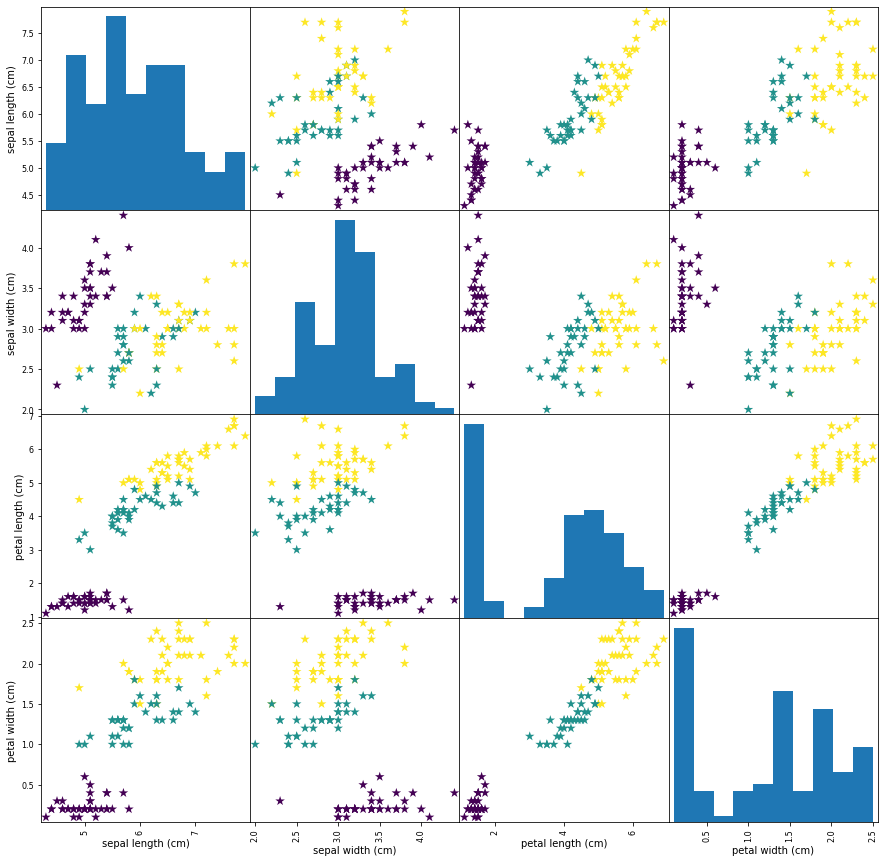

In [18]:
# Ejemplo con cambios en los parámetros
grr = pd.plotting.scatter_matrix(iris_dataframe, c=[y_train], figsize=(15, 15), marker='*', hist_kwds={'bins': 10}, s=100,alpha=2)

From the plots, we can see that the three classes seem to be relatively well separated
using the sepal and petal measurements. This means that a machine learning model
will likely be able to learn to separate them.

## Building Your First Model: k-Nearest Neighbors

Now we can start building the actual machine learning model. There are many classi‐
fication algorithms in scikit-learn that we could use. Here we will use a k-nearest
neighbors classifier, which is easy to understand. Building this model only consists of
storing the training set. To make a prediction for a new data point, the algorithm
finds the point in the training set that is closest to the new point. Then it assigns the
label of this training point to the new data point.

All machine learning models in scikit-learn are implemented in their own classes,
which are called Estimator classes. The k-nearest neighbors classification algorithm
is implemented in the KNeighborsClassifier class in the neighbors module. Before
we can use the model, we need to instantiate the class into an object. This is when we
will set any parameters of the model. The most important parameter of KNeighbor
sClassifier is the number of neighbors, which we will set to 1:

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

The knn object encapsulates the algorithm that will be used to build the model from
the training data, as well the algorithm to make predictions on new data points. It will
also hold the information that the algorithm has extracted from the training data. In
the case of KNeighborsClassifier, it will just store the training set.

To build the model on the training set, we call the fit method of the knn object,
which takes as arguments the NumPy array X_train containing the training data and
the NumPy array y_train of the corresponding training labels:

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Making Predictions

We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with a sepal length of
5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [22]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Note that we made the measurements of this single flower into a row in a twodimensional NumPy array, as scikit-learn always expects two-dimensional arrays for the data.

To make a prediction, we call the predict method of the knn object:

In [23]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


## Evaluating the Model
This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species is for each iris in the test
set.

Therefore, we can make a prediction for each iris in the test data and compare it
against its label (the known species). We can measure how well the model works by
computing the accuracy, which is the fraction of flowers for which the right species
was predicted:

In [24]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [25]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


We can also use the score method of the knn object, which will compute the test set
accuracy for us:

In [26]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right
prediction for 97% of the irises in the test set. Under some mathematical assump‐
tions, this means that we can expect our model to be correct 97% of the time for new
irises. For our hobby botanist application, this high level of accuracy means that our
model may be trustworthy enough to use. In later chapters we will discuss how we
can improve performance, and what caveats there are in tuning a model.